In [78]:
import sys
sys.path.append('..\\')
sys.path

['D:\\workspace\\ratter\\notebooks',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\python37.zip',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\DLLs',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\lib',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci',
 '',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\lib\\site-packages',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\lib\\site-packages\\win32',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Fabi\\miniconda3\\envs\\sci\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Fabi\\.ipython',
 '../ratter',
 '..\\ratter',
 '..\\ratter',
 '..\\',
 '..\\',
 '..\\',
 '..\\']

In [42]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from ratter import Material, Layer, Layerstack, as_function_of, LAMBDA_VAC

In [43]:
wavelength = 600 # length units: nm

Si = Material('Si', refractive_index_value=3.9400+0.019934j)  # Green 2008
air = Material('air', refractive_index_value=1.00027698) # Ciddor 1996
SiO2 = Material('SiO2', refractive_index_value=1.4580) # Malitson 1965: Fused silica
AlOx = Material('Al2O3', refractive_index_value=1.7675) # Malitson and Dodge 1972: α-Al2O3 (Sapphire)

In [54]:
environment = Layer('env', air)
coating1 = Layer('coat1', SiO2)
coating2 = Layer('coat2', AlOx)
bulk = Layer('bulk', Si)

In [55]:
stack = Layerstack([environment, coating1, coating2, bulk])

In [56]:
r = stack.reflectance_amplitude()

In [68]:
R = sp.conjugate(r)*r

In [69]:
R_ = R.subs(LAMBDA_VAC, wavelength)
R_of_coating_thickness = as_function_of(R_, [coating1.thickness_symbol, coating2.thickness_symbol])

Text(0.5, 0, '$SiO_2$ thickness (nm)')

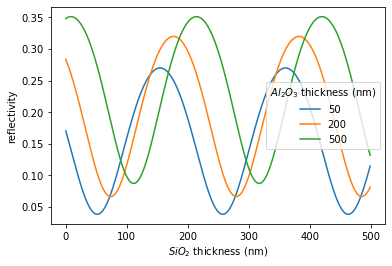

In [82]:
d1 = np.arange(0,500)

for d2 in [50,200,500]:
    plt.plot(d1, np.real(R_of_coating_thickness(d1, d2)), label='{}'.format(d2))
plt.legend(title='$Al_2O_3$ thickness (nm)')
plt.ylabel('reflectivity')
plt.xlabel('$SiO_2$ thickness (nm)')